<a href="https://colab.research.google.com/github/EmmanueDavidL/Ciencia_De_Datos2025/blob/main/Archivo_analisis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Configuración
API_KEY = "RGAPI-4a513307-4c83-48fe-9602-c91405b3d98a"
riot_name = "Rerzd"
riot_tag = "LAN"

# 2. PUUID del jugador
url_account = f"https://americas.api.riotgames.com/riot/account/v1/accounts/by-riot-id/{riot_name}/{riot_tag}?api_key={API_KEY}"
resp = requests.get(url_account).json()

# Verificar errores en la respuesta
if "status" in resp:
    print(f"Error fetching account data: {resp['status']['message']} (Status Code: {resp['status']['status_code']})")
else:
    puuid = resp["puuid"]
    print("PUUID:", puuid)

    # 3. IDs de partidas recientes (últimas 30 partidas)
    url_matches = f"https://americas.api.riotgames.com/lol/match/v5/matches/by-puuid/{puuid}/ids?start=0&count=100&api_key={API_KEY}"
    matches = requests.get(url_matches).json()

    print("Número de partidas obtenidas:", len(matches))

    # 4. Estadísticas de cada partida
    data = []

    for match_id in matches:
        url_match = f"https://americas.api.riotgames.com/lol/match/v5/matches/{match_id}?api_key={API_KEY}"
        match_data = requests.get(url_match).json()

        # Check for errors in the match data response
        if "status" in match_data:
            print(f"Error fetching match data for {match_id}: {match_data['status']['message']} (Status Code: {match_data['status']['status_code']})")
            continue # Skip to the next match if there's an error

        # Buscar al jugador en la partida
        for player in match_data["info"]["participants"]:
            if player["puuid"] == puuid:
                # Verificar si el rol del jugador es "Jungler"
                if player["teamPosition"] == "JUNGLE":
                    stats = {
                        "Partida": match_id,
                        "Campeón": player["championName"],
                        "Kills": player["kills"],
                        "Deaths": player["deaths"],
                        "Assists": player["assists"],
                        "KDA": round((player["kills"] + player["assists"]) / (player["deaths"] if player["deaths"] > 0 else 1), 2),
                        "CS": player["totalMinionsKilled"] + player.get("neutralMinionsKilled", 0),
                        "Farm de jungla": player.get("neutralMinionsKilled", 0),
                        "Objetivos": player.get("dragonKills", 0) + player.get("baronKills", 0) + player.get("riftHeraldKills", 0),
                        "Visión": player["visionScore"],
                        "Daño infligido": player["totalDamageDealtToChampions"],
                        "Daño recibido": player["totalDamageTaken"],
                        "Resultado": "Victoria" if player["win"] else "Derrota"
                    }
                    data.append(stats)

    # 5. Convertir a DataFrame y mostrar
    df = pd.DataFrame(data)
    print(df)

    # 6. Resumen general
    avg_kda = round(df["KDA"].mean(), 2)
    avg_cs = round(df["CS"].mean(), 2)
    avg_farm_jungla = round(df["Farm de jungla"].mean(), 2)
    avg_objetivos = round(df["Objetivos"].mean(), 2)
    avg_vision = round(df["Visión"].mean(), 2)
    most_played = df["Campeón"].value_counts().index[0]

    print("\n=== RESUMEN GENERAL ===")
    print("Promedio de KDA:", avg_kda)
    print("Promedio de CS:", avg_cs)
    print("Promedio de farm de jungla:", avg_farm_jungla)
    print("Promedio de objetivos (dragones, barones, heraldos):", avg_objetivos)
    print("Promedio de visión:", avg_vision)
    print("Campeón más jugado:", most_played)

    # 7. Generar informe de mejora
    print("\n=== INFORME DE MEJORA ===")
    if avg_kda < 2:
        print("- Tu KDA es bajo. Necesitas mejorar tu posicionamiento y la toma de decisiones en peleas.")
    elif avg_kda < 4:
        print("- Tu KDA es decente, pero puedes mejorar con un mejor control de la jungla.")
    else:
        print("- Muy buen KDA, manejas bien el riesgo y las peleas.")

    if avg_farm_jungla < 50:
        print("- Tu farm en la jungla es bajo. Trabaja en mejorar el clear de campamentos.")
    elif avg_farm_jungla < 100:
        print("- Tu farm en la jungla es decente, pero puedes optimizar los tiempos de rotación.")
    else:
        print("- Muy buen farm en la jungla, controlas bien los recursos.")

    if avg_objetivos < 1:
        print("- Estás asegurando pocos objetivos en el mapa. Trabaja en coordinarte mejor con tu equipo para los dragones y barones.")
    elif avg_objetivos < 2:
        print("- Aseguras objetivos, pero aún puedes mejorar tu control sobre los mismos.")
    else:
        print("- Excelente control de objetivos. Estás jugando como un jungler eficiente.")

    if avg_vision < 20:
        print("- Tu visión es baja. Coloca más wards en la jungla para proporcionar información a tu equipo.")
    elif avg_vision < 40:
        print("- Tu visión es aceptable, pero puedes mejorar el control de la visión en la jungla y en objetivos clave.")
    else:
        print("- Muy buen uso de visión. Tu equipo tiene buena información sobre el mapa.")

    print(f"- Tu campeón más jugado es **{most_played}**. Especialízate en dominarlo aún más o trabaja en un pool de junglas flexibles.")



PUUID: cYv8MNu1wzYTu6oDoMRB6nLFz9s3JTRS73VqVsHAx7ONs9Oz3O_tNjAYEM4Lf2DdYlwLvdMGQNlxbg
Número de partidas obtenidas: 100
Error fetching match data for LA1_1612117175: rate limit exceeded (Status Code: 429)
Error fetching match data for LA1_1612105618: rate limit exceeded (Status Code: 429)
           Partida   Campeón  Kills  Deaths  Assists    KDA   CS  \
0   LA1_1652191389    Rengar     11       8        8   2.38  210   
1   LA1_1651681691  JarvanIV     11      10       22   3.30  198   
2   LA1_1651586195  JarvanIV      9       6        6   2.50  129   
3   LA1_1651573327  JarvanIV      3       7       15   2.57  198   
4   LA1_1651374879  JarvanIV      7       5       15   4.40  177   
..             ...       ...    ...     ...      ...    ...  ...   
79  LA1_1624575390  JarvanIV      9       7       13   3.14  154   
80  LA1_1624477764    Lillia      1       7        0   0.14  117   
81  LA1_1624470292    Lillia      5       1        2   7.00  116   
82  LA1_1624418366  JarvanIV  

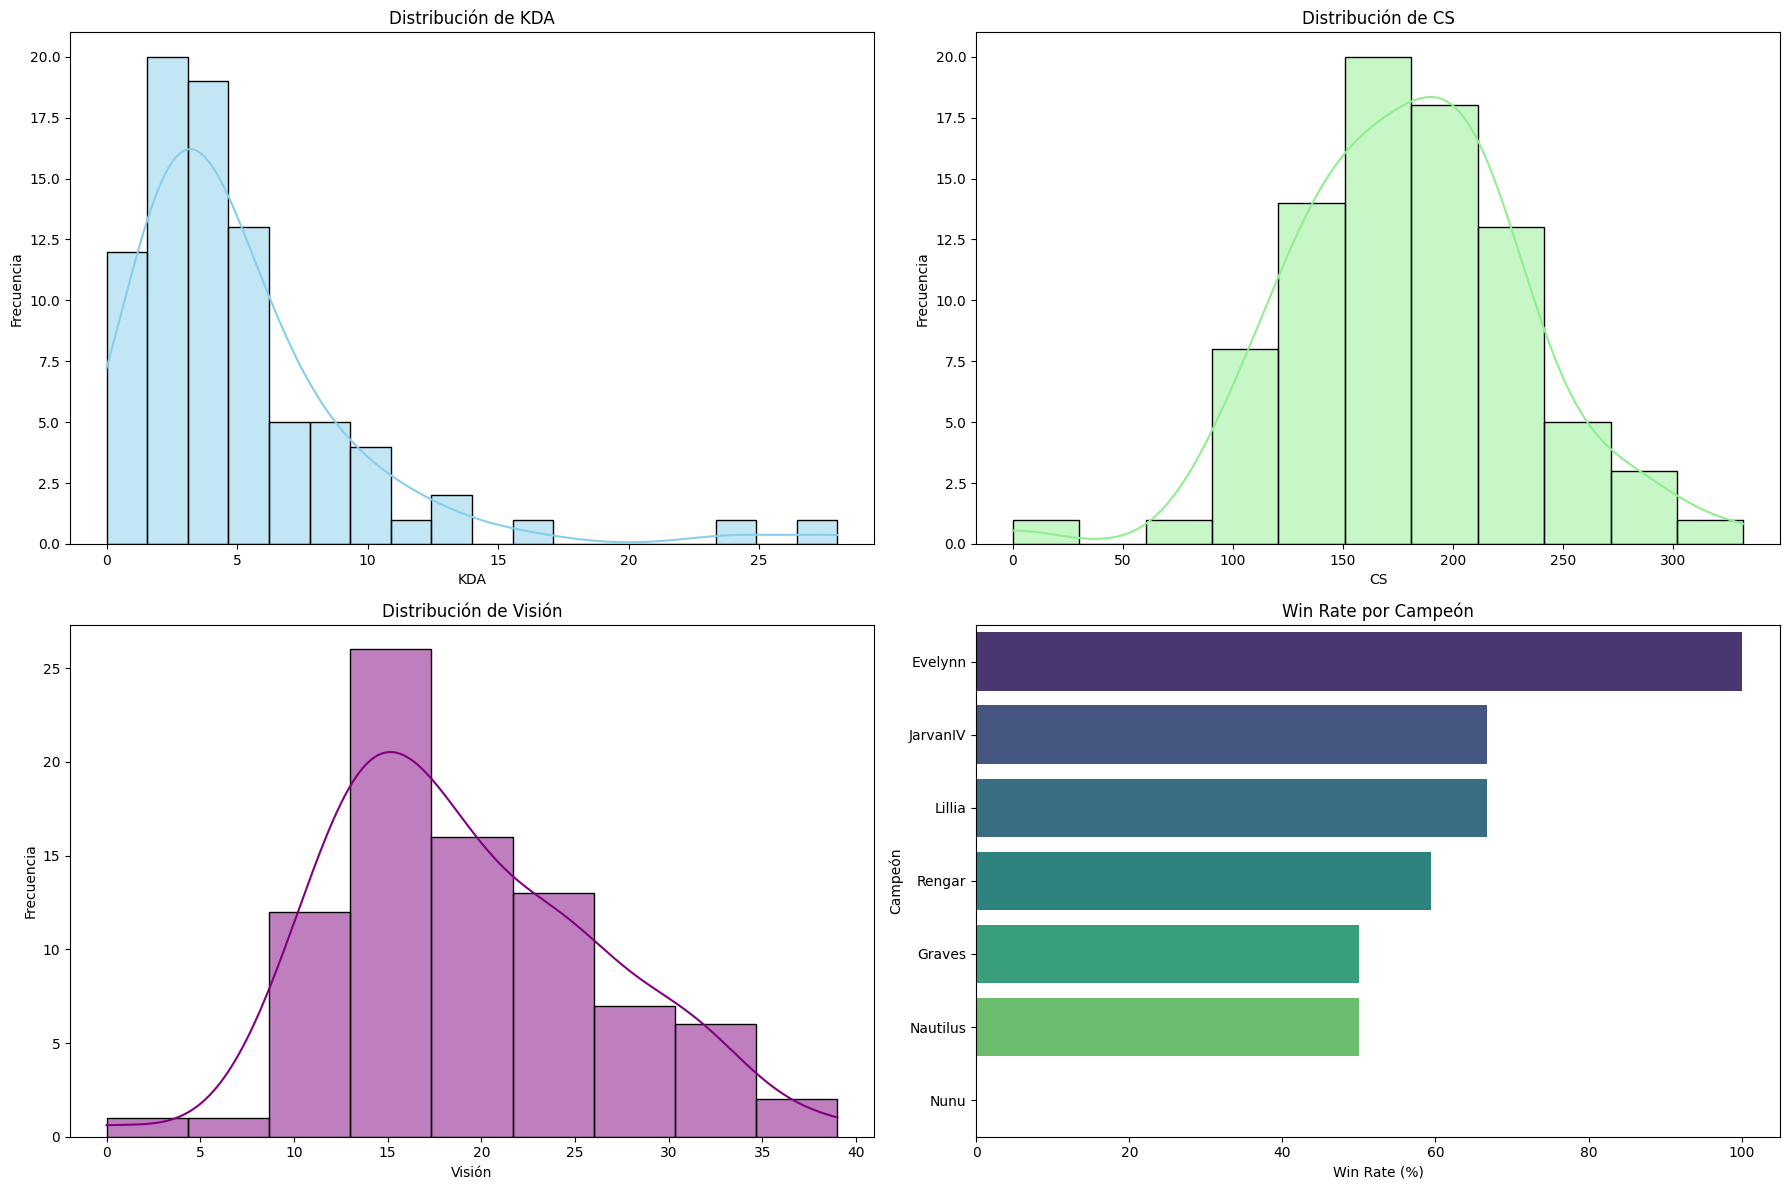

In [24]:
def create_additional_visualizations(df):
    plt.style.use('default')
    sns.set_palette("Set2")
    fig = plt.figure(figsize=(18, 12))

    # 2. Distributions of KDA, CS, Vision
    ax2 = plt.subplot(2, 2, 1)
    sns.histplot(df["KDA"], kde=True, ax=ax2, color="skyblue")
    ax2.set_title("Distribución de KDA")
    ax2.set_xlabel("KDA")
    ax2.set_ylabel("Frecuencia")

    ax3 = plt.subplot(2, 2, 2)
    sns.histplot(df["CS"], kde=True, ax=ax3, color="lightgreen")
    ax3.set_title("Distribución de CS")
    ax3.set_xlabel("CS")
    ax3.set_ylabel("Frecuencia")

    ax4 = plt.subplot(2, 2, 3)
    sns.histplot(df["Visión"], kde=True, ax=ax4, color="purple")
    ax4.set_title("Distribución de Visión")
    ax4.set_xlabel("Visión")
    ax4.set_ylabel("Frecuencia")

    # 3. Win Rate by Champion
    win_rate_by_champion = df.groupby("Campeón")["Resultado"].apply(lambda x: (x == "Victoria").sum() / len(x) * 100).reset_index(name="Win Rate (%)")
    ax5 = plt.subplot(2, 2, 4)
    sns.barplot(x="Win Rate (%)", y="Campeón", data=win_rate_by_champion.sort_values(by="Win Rate (%)", ascending=False), ax=ax5, palette="viridis", hue="Campeón", legend=False)
    ax5.set_title("Win Rate por Campeón")
    ax5.set_xlabel("Win Rate (%)")
    ax5.set_ylabel("Campeón")

    plt.tight_layout()
    plt.show()

create_additional_visualizations(df)

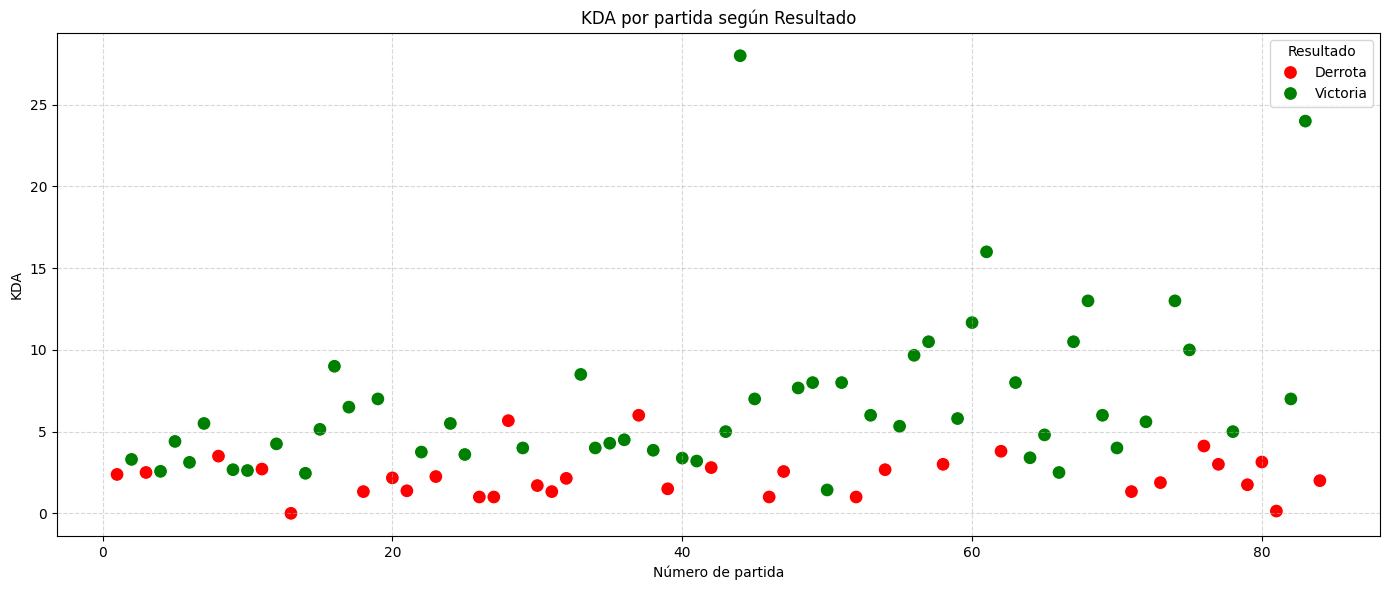

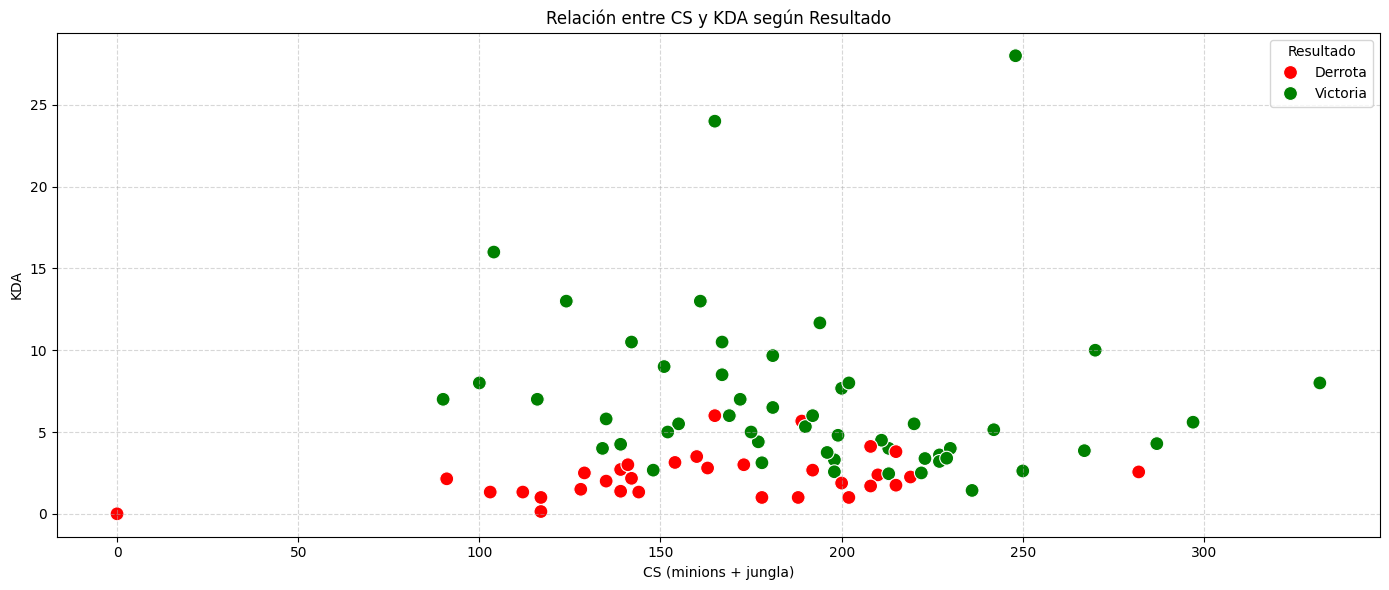

/tmp/ipython-input-2658136412.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_campeones.values, y=top_campeones.index, palette='viridis')


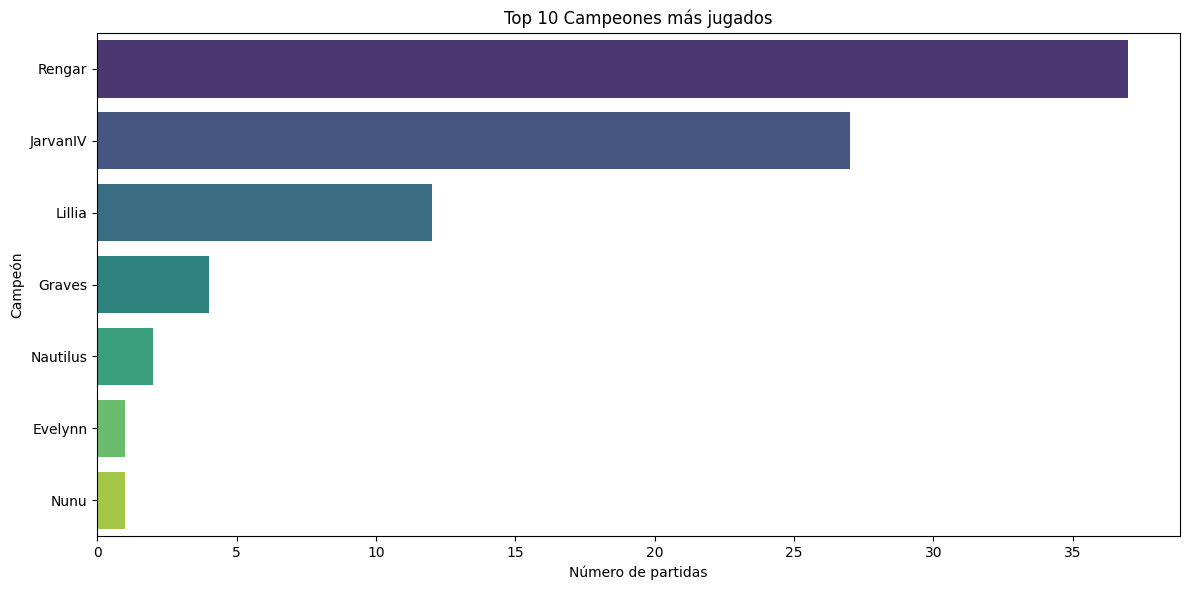

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Agregar número de partida para ordenar
df['Número de partida'] = range(1, len(df) + 1)

# 2. KDA por partida, coloreado según resultado
plt.figure(figsize=(14, 6))
sns.scatterplot(data=df, x='Número de partida', y='KDA', hue='Resultado', palette={'Victoria':'green', 'Derrota':'red'}, s=100)
plt.title('KDA por partida según Resultado')
plt.xlabel('Número de partida')
plt.ylabel('KDA')
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(title='Resultado')
plt.tight_layout()
plt.show()

# 3. Relación CS vs KDA con color según resultado
plt.figure(figsize=(14, 6))
sns.scatterplot(data=df, x='CS', y='KDA', hue='Resultado', palette={'Victoria':'green', 'Derrota':'red'}, s=100)
plt.title('Relación entre CS y KDA según Resultado')
plt.xlabel('CS (minions + jungla)')
plt.ylabel('KDA')
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(title='Resultado')
plt.tight_layout()
plt.show()

# 4. Número de partidas por campeón (top 10)
plt.figure(figsize=(12, 6))
top_campeones = df['Campeón'].value_counts().nlargest(10)
sns.barplot(x=top_campeones.values, y=top_campeones.index, palette='viridis')
plt.title('Top 10 Campeones más jugados')
plt.xlabel('Número de partidas')
plt.ylabel('Campeón')
plt.tight_layout()
plt.show()


